In [1]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv
import Impedance as imp
from  LHC_param import *
from particle_param import proton_param
import pickle as pkl
import itertools

### Beam dynamics parameters

In [2]:
e,m0,c,E0  = proton_param()
machine = LHC(E0, E=6.5e12,scenario='Nominal LHC')
machine.Qp = np.array([0])
nxscan = np.array([0])
machine.Nbscan = np.array([1e11])
omegasscan = np.array([machine.Qs])
machine.M = 1
machine.taub = 0.92e-9
mmax = 0

### Collect impedance models

In [3]:
CollDir='/afs/cern.ch/work/n/nbiancac/scratch0/IRIS/LHC_IW_model/Coll_settings/'
mainDir='/afs/cern.ch/user/n/nbiancac/ln_work/scratch0/DELPHI_results/LHC/MD/'

ResultDir=mainDir+'Results/'

comment='Fill-5130_20160729_Scan_3'; # for saved files
filename=[
    'LHC_ft_6.5TeV_B1_2016_'+comment+'_open',
    'LHC_ft_6.5TeV_B1_2016_'+comment+'_closed'] # name of collgaps files

### Total machine tune shift

In [4]:
imp_mod_scan = {}

element_vec=[
'Total',
'Tapers-triplets',
'BPM-triplets',
'Pumping-holes',
'RF-CMS-ALICE-LHCb',
'Other-BB',
'Geom-coll',
'RW-coll',
'RW-beam-screen',
'RW-warmpipe']


for ind,fn in enumerate(filename):
    print fn
    imp_mod_scan[fn] = {}
    for element in element_vec:
        
        imp_mod_scan[fn][element]= {}
        print element
        imp_mod = []
        for comp in ['long','xdip', 'xquad','ydip', 'yquad']:    
            try: 
                iw = imp.imp_model_from_file(mainDir+fn+'/Z'+comp+'_'+element+'_'+fn+'.dat'
                                             ,'Z'+comp, ignored_rows=1)
                imp.add_impedance_wake(imp_mod,iw,1,1)
            except IOError: 
                print "No "+comp+" component: adding zeros"
                a,b,c,d,plane,wakeflag=imp.identify_component('Z'+comp)
                Z = imp.impedance_wake(a=a,b=b,c=c,d=d, plane=plane)
                Z.func = np.vstack((Z.func,Z.func)).T
                imp.add_impedance_wake(imp_mod,[Z],1,1)
        
        imp_mod_scan[fn][element]['imp_mod']= imp_mod
        
        print 'Getting tune shift...'
        Zeff_tot = 0
        ts_tot = 0
        for comp in ['xdip', 'xquad','ydip', 'yquad']:
            if 'x' in comp:
                Q = machine.Qx
            elif 'y' in comp:
                Q = machine.Qy     
            tuneshift_most, tuneshift_nx, tuneshift_m0, Zeff = imp.sacherer(imp_mod, machine.Qp, nxscan, machine.Nbscan, omegasscan, machine.M, 
                     machine.omega0, Q, machine.gamma, machine.eta, machine.taub, mmax, particle='proton', modetype='sinusoidal', compname='Z'+comp)
            imp_mod_scan[fn][element]['tuneshift_m0_'+comp]= []
            imp_mod_scan[fn][element]['Zeff_'+comp]= []
            imp_mod_scan[fn][element]['tuneshift_m0_'+comp]= np.squeeze(tuneshift_m0)
            imp_mod_scan[fn][element]['Zeff_'+comp]= np.squeeze(Zeff)
        
        for comp in ['long']:
            Zleff = imp.Zl_eff(imp_mod,machine,1)
            imp_mod_scan[fn][element]['Z_over_n_eff_'+comp]= []
            imp_mod_scan[fn][element]['Z_over_n_eff_'+comp]= Zleff
            
    imp_mod_scan[fn]['machine'] = machine


LHC_ft_6.5TeV_B1_2016_Fill-5130_20160729_Scan_3_open
Total
Getting tune shift...
Sacherer: Qp= 0 , M= 1 , omegas= 0.00212193980709 , m= 0 , Most unstable coupled-bunch mode:  0
Sacherer: Qp= 0 , M= 1 , omegas= 0.00212193980709 , m= 0 , Most unstable coupled-bunch mode:  0
Sacherer: Qp= 0 , M= 1 , omegas= 0.00212193980709 , m= 0 , Most unstable coupled-bunch mode:  0
Sacherer: Qp= 0 , M= 1 , omegas= 0.00212193980709 , m= 0 , Most unstable coupled-bunch mode:  0
max number of line index Pmax=196844
Tapers-triplets
No xquad component: adding zeros
No yquad component: adding zeros
Getting tune shift...
Sacherer: Qp= 0 , M= 1 , omegas= 0.00212193980709 , m= 0 , Most unstable coupled-bunch mode:  0
Sacherer: Qp= 0 , M= 1 , omegas= 0.00212193980709 , m= 0 , Most unstable coupled-bunch mode:  0
Sacherer: Qp= 0 , M= 1 , omegas= 0.00212193980709 , m= 0 , Most unstable coupled-bunch mode:  0
Sacherer: Qp= 0 , M= 1 , omegas= 0.00212193980709 , m= 0 , Most unstable coupled-bunch mode:  0
max number

/home/nick/HDD/Work/Python-scripts/IW2D/PYTHON_codes_and_scripts/Impedance_lib_Python/Impedance.py:2556: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if (omegaZ==None):
/home/nick/HDD/Work/Python-scripts/IW2D/PYTHON_codes_and_scripts/Impedance_lib_Python/Impedance.py:2584: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if (Z!=None):
/home/nick/HDD/Work/Python-scripts/IW2D/PYTHON_codes_and_scripts/Impedance_lib_Python/Impedance.py:2617: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if (Z!=None):


###  Total impedance plot

/afs/cern.ch/user/n/nbiancac/ln_work/scratch0/DELPHI_results/LHC/MD/Results/Fill-5130_20160729_Scan_3_Zt_total.png
/afs/cern.ch/user/n/nbiancac/ln_work/scratch0/DELPHI_results/LHC/MD/Results/Fill-5130_20160729_Scan_3_Zlong_total.png


/home/nick/HDD/Work/Anaconda/lib/python2.7/site-packages/matplotlib/scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


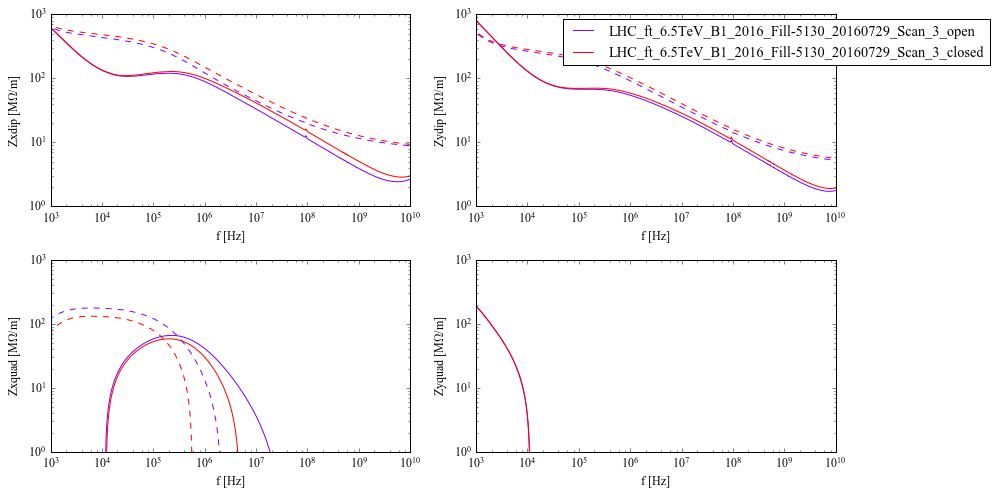

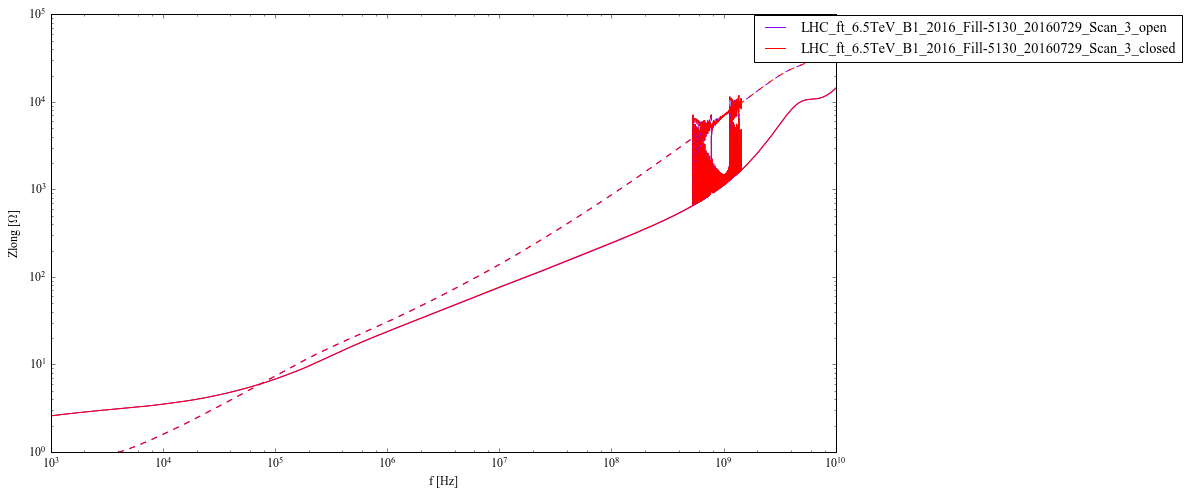

In [5]:
from cycler import cycler
import matplotlib.cm as cm

comp_vec = ['Zxdip','Zydip','Zxquad','Zyquad']

plt.close('all')

fig = plt.figure(figsize=(12,7))

colors = cm.rainbow(np.linspace(0, 1, len(filename)))

for part in ['real','imag']:
    
    for icomp,comp in enumerate(comp_vec):
    
        ax = fig.add_subplot(2,2,icomp+1)
        ax.set_prop_cycle(cycler('color', colors))
        for ind,fn in enumerate(filename):
            
            a,b,c,d,plane,wakeflag=imp.identify_component(comp)
            for imp_comp in imp_mod_scan[fn]['Total']['imp_mod']:
                if imp.test_impedance_wake_comp(imp_comp, a, b, c, d, plane):
                    Z_tot=imp_comp.func[:,0]+1j*imp_comp.func[:,1]
                    freq_tot=imp_comp.var
                    mpl.rcParams.update({'font.size': 12})
                    if part=='real':
                        ax.loglog(freq_tot,eval('Z_tot.'+part)/1e6,'-')
                    else:
                        ax.loglog(freq_tot,eval('Z_tot.'+part)/1e6,'--')
                    plt.xlabel('f [Hz]')
                    plt.ylabel(comp+' [M$\Omega$/m]')
                    if icomp == 1:
                        lgd = plt.legend(filename,bbox_to_anchor=(1.45, 1.015))
                    plt.xlim(1e3, 1e10)
                    plt.ylim(1e0, 1e3)
        
plt.tight_layout()
plt.savefig(ResultDir+comment+'_Zt_total'+'.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(ResultDir+comment+'_Zt_total'+'.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')   
print ResultDir+comment+'_Zt_total'+'.png'

comp_vec = ['Zlong']

fig = plt.figure(figsize=(12,7))

colors = cm.rainbow(np.linspace(0, 1, len(filename)))

for part in ['real','imag']:
    
    for icomp,comp in enumerate(comp_vec):
    
        ax = fig.add_subplot(1,1,icomp+1)
        ax.set_prop_cycle(cycler('color', colors))
        for ind,fn in enumerate(filename):
            
            a,b,c,d,plane,wakeflag=imp.identify_component(comp)
            for imp_comp in imp_mod_scan[fn]['Total']['imp_mod']:
                if imp.test_impedance_wake_comp(imp_comp, a, b, c, d, plane):
                    Z_tot=imp_comp.func[:,0]+1j*imp_comp.func[:,1]
                    freq_tot=imp_comp.var
                    mpl.rcParams.update({'font.size': 12})
                    if part=='real':
                        ax.loglog(freq_tot,eval('Z_tot.'+part),'-')
                    else:
                        ax.loglog(freq_tot,eval('Z_tot.'+part),'--')
                    plt.xlabel('f [Hz]')
                    plt.ylabel(comp+' [$\Omega$]')
                    if icomp == 0:
                        lgd = plt.legend(filename,bbox_to_anchor=(1.45, 1.015))
                    plt.xlim(1e3, 1e10)
                    plt.ylim(1e0, 1e5)
        
plt.tight_layout()
plt.savefig(ResultDir+comment+'_Zlong_total'+'.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(ResultDir+comment+'_Zlong_total'+'.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')   
print ResultDir+comment+'_Zlong_total'+'.png'

### Percentage plot

/afs/cern.ch/user/n/nbiancac/ln_work/scratch0/DELPHI_results/LHC/MD/Results/Fill-5130_20160729_Scan_3_ real_Zlong_perc.pdf
/afs/cern.ch/user/n/nbiancac/ln_work/scratch0/DELPHI_results/LHC/MD/Results/Fill-5130_20160729_Scan_3_ real_Zxdip_perc.pdf
/afs/cern.ch/user/n/nbiancac/ln_work/scratch0/DELPHI_results/LHC/MD/Results/Fill-5130_20160729_Scan_3_ real_Zydip_perc.pdf
/afs/cern.ch/user/n/nbiancac/ln_work/scratch0/DELPHI_results/LHC/MD/Results/Fill-5130_20160729_Scan_3_ real_Zxquad_perc.pdf
/afs/cern.ch/user/n/nbiancac/ln_work/scratch0/DELPHI_results/LHC/MD/Results/Fill-5130_20160729_Scan_3_ real_Zyquad_perc.pdf
/afs/cern.ch/user/n/nbiancac/ln_work/scratch0/DELPHI_results/LHC/MD/Results/Fill-5130_20160729_Scan_3_ imag_Zlong_perc.pdf
/afs/cern.ch/user/n/nbiancac/ln_work/scratch0/DELPHI_results/LHC/MD/Results/Fill-5130_20160729_Scan_3_ imag_Zxdip_perc.pdf
/afs/cern.ch/user/n/nbiancac/ln_work/scratch0/DELPHI_results/LHC/MD/Results/Fill-5130_20160729_Scan_3_ imag_Zydip_perc.pdf
/afs/cern.ch/u

/media/HDD/Work/Anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:34: RuntimeWarning: invalid value encountered in divide


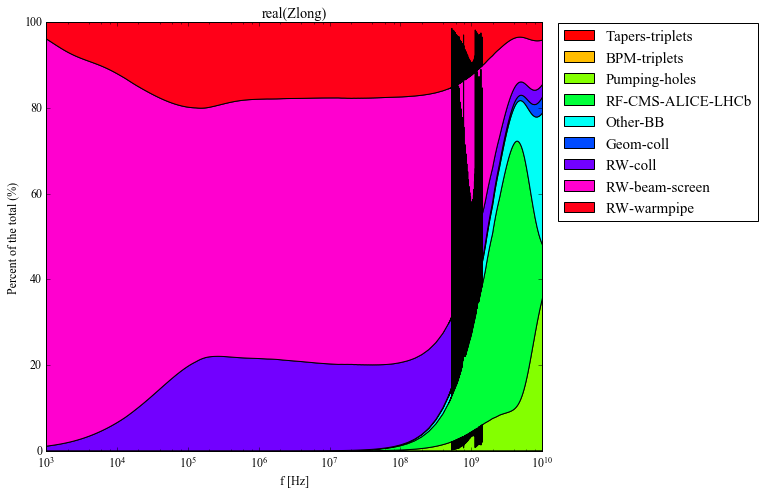

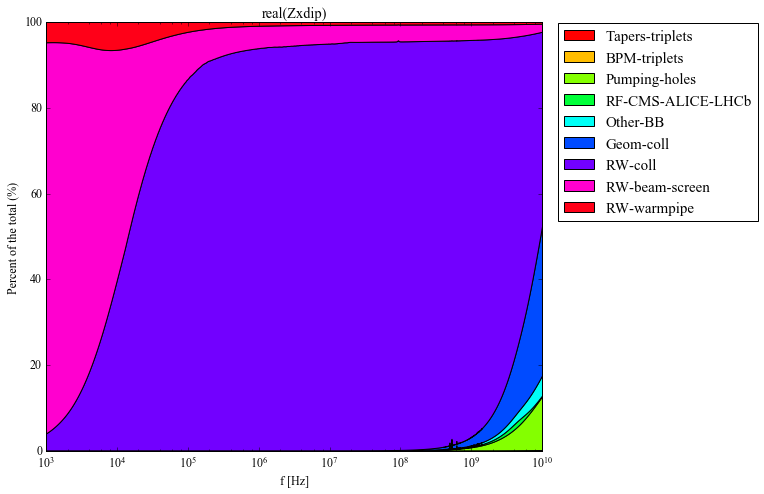

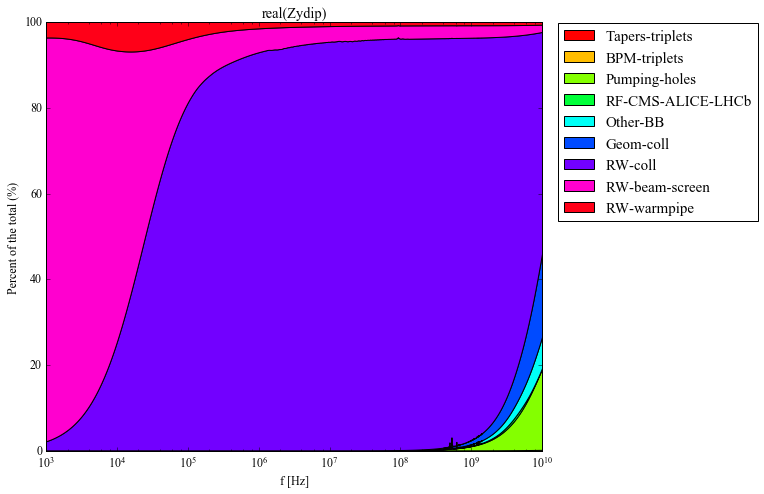

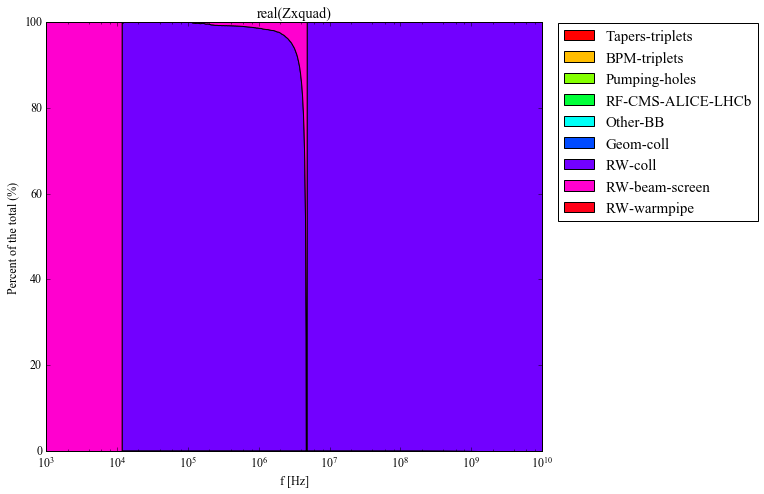

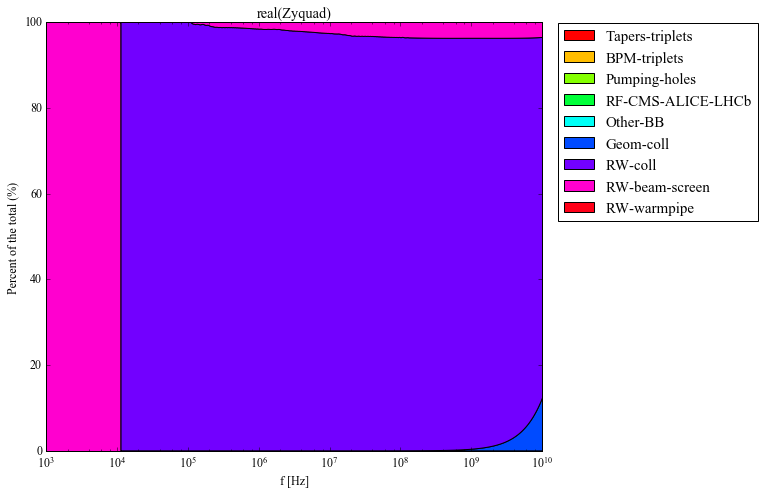

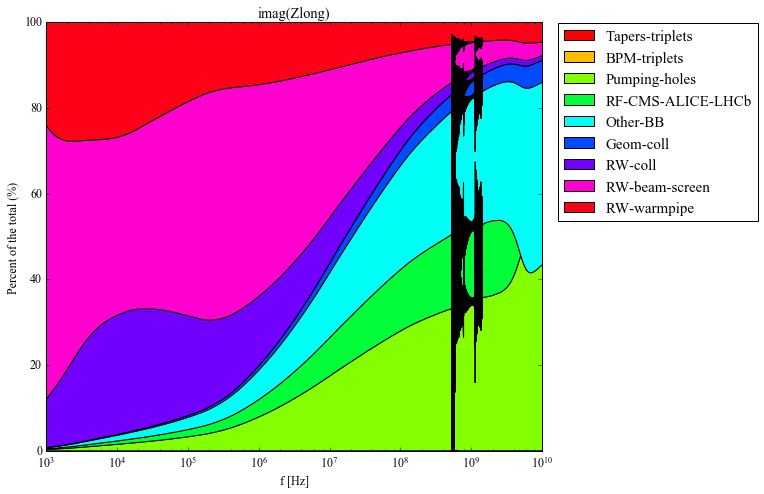

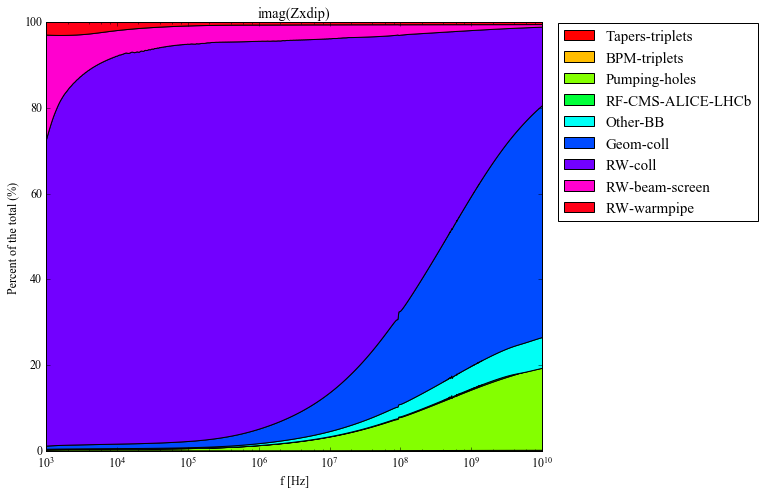

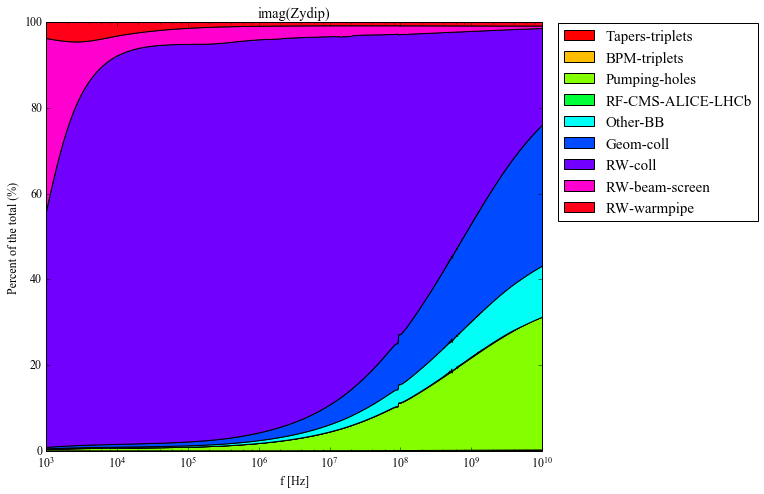

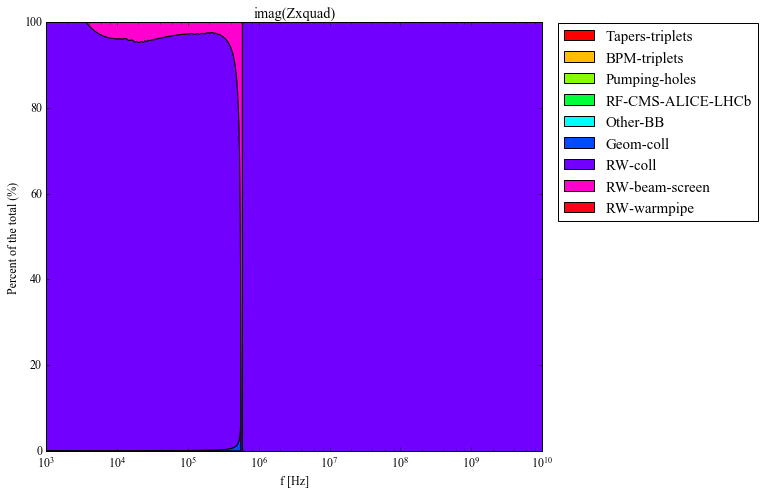

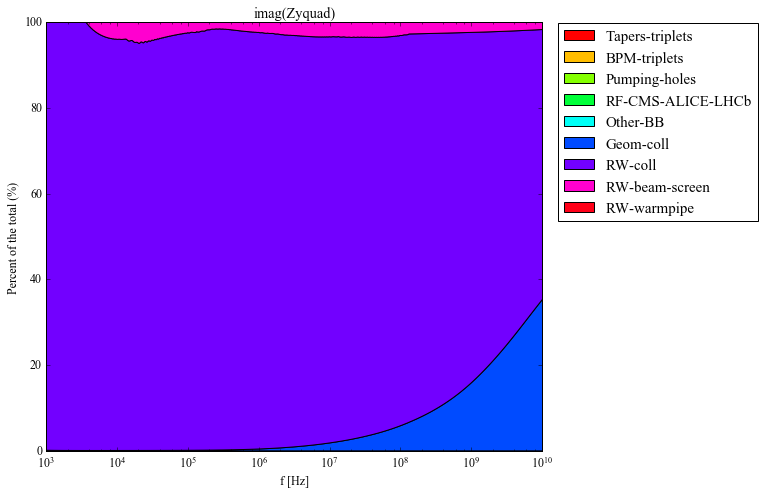

In [6]:
from cycler import cycler
import matplotlib.cm as cm
import itertools

if 'Total' in element_vec: element_vec.pop(element_vec.index('Total'))

for part,comp in itertools.product(['real','imag'],['Zlong','Zxdip','Zydip','Zxquad','Zyquad']):

    a,b,c,d,plane,wakeflag=imp.identify_component(comp)
    for imp_comp in imp_mod_scan[fn]['Total']['imp_mod']:
        if imp.test_impedance_wake_comp(imp_comp, a, b, c, d, plane):
            Z_tot=imp_comp.func[:,0]+1j*imp_comp.func[:,1]
            freq_tot=imp_comp.var


    y=[]
    for element in element_vec:

        a,b,c,d,plane,wakeflag=imp.identify_component(comp)
        for imp_comp in imp_mod_scan[fn][element]['imp_mod']:

            if imp.test_impedance_wake_comp(imp_comp, a, b, c, d, plane):

                Z=imp_comp.func[:,0]+1j*imp_comp.func[:,1]
                freq=imp_comp.var
                Z_int=np.interp(freq_tot,freq,Z.real)+1j*np.interp(freq_tot,freq,Z.imag)
                y.append(Z_int)

    y = np.row_stack(y)
    x = freq_tot


    y = eval('y.'+part)
    percent = y /  y.sum(axis=0).astype(float) * 100 

    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(121)
    colors = cm.hsv(np.linspace(0, 1, len(element_vec)))
    ax.set_prop_cycle(cycler('color', colors))
    ax.stackplot(x, percent)
    ax.set_xscale('log')
    plt.xlim(1e3, 1e10)
    plt.ylim(0, 100)
    ax.set_ylabel('Percent of the total (%)')
    ax.set_xlabel('f [Hz]')
    plt.title(part+'('+comp+')')
    ax.margins(0, 0) # Set margins to avoid "whitespace"
    lgd = plt.legend(element_vec, fontsize=15, bbox_to_anchor=(1.45, 1.015))
    plt.tight_layout()
    
    plt.savefig(ResultDir+comment+'_'+part+'_'+comp+'_perc.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig(ResultDir+comment+'_'+part+'_'+comp+'_perc.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')   
    print ResultDir+comment+'_',part+'_'+comp+'_perc.pdf'

/afs/cern.ch/user/n/nbiancac/ln_work/scratch0/DELPHI_results/LHC/MD/Results/Fill-5130_20160729_Scan_3_tsm0_total.png


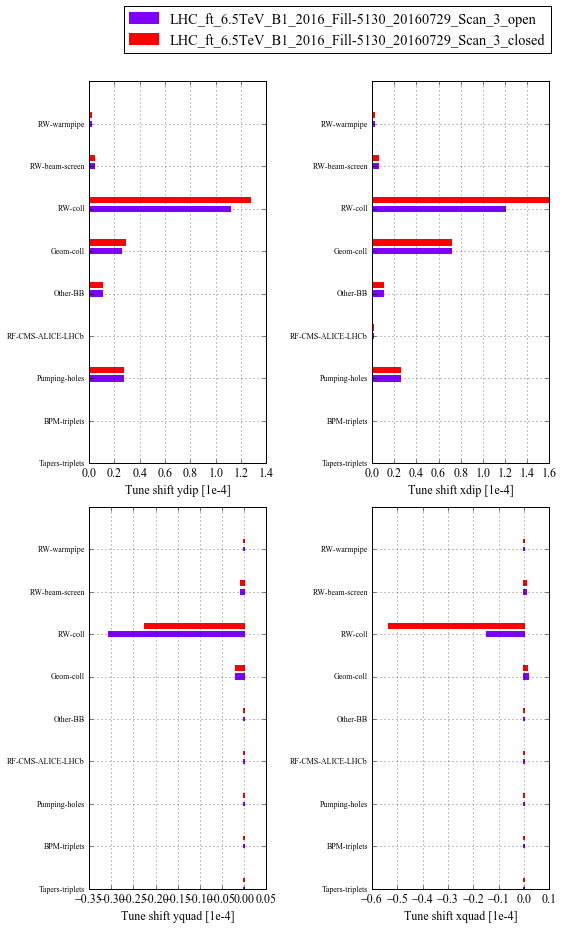

In [7]:
comp_vec=['ydip', 'xdip','yquad','xquad']

colors = cm.rainbow(np.linspace(0, 1, len(filename)))

fig = plt.figure(figsize=(8,12))

for icomp , comp in enumerate(comp_vec):
    
    
    ax = fig.add_subplot(2,2,icomp+1)
    
    
    
    for ind,fn in enumerate(filename):
        x_vec=[];
        for element in element_vec:

            x = imp_mod_scan[fn][element]['tuneshift_m0_'+comp]
            x_vec.append(-x.real)

        x_vec=np.array(x_vec)

        ax.barh(np.arange(len(x_vec))+.2*ind, x_vec*1e4, .1, 
             align='center', edgecolor=colors[ind], facecolor = colors[ind], alpha = 1, linewidth = 2)
        

    plt.yticks(np.arange(len(element_vec)), element_vec, fontsize=8)
    plt.ylim(0,len(element_vec))
#     plt.xlim(0,5e-5)
    plt.xlabel('Tune shift '+comp+' [1e-4]')
    plt.grid()
    if icomp==1: lgd = plt.legend(filename,bbox_to_anchor=(1.05, 1.215))
    plt.tight_layout()      

plt.savefig(ResultDir+comment+'_tsm0_total.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(ResultDir+comment+'_tsm0_total.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')   
print ResultDir+comment+'_tsm0_total.png'

/afs/cern.ch/user/n/nbiancac/ln_work/scratch0/DELPHI_results/LHC/MD/Results/Fill-5130_20160729_Scan_3_Zteff_total.png


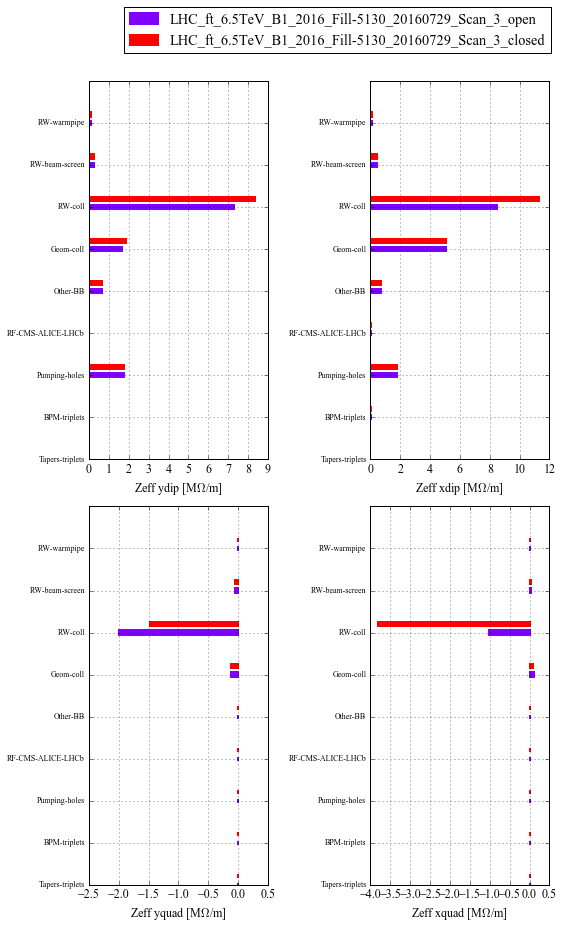

In [8]:
comp_vec=['ydip', 'xdip','yquad','xquad']

colors = cm.rainbow(np.linspace(0, 1, len(filename)))

fig = plt.figure(figsize=(8,12))

for icomp , comp in enumerate(comp_vec):
    
    
    ax = fig.add_subplot(2,2,icomp+1)
    
    
    
    for ind,fn in enumerate(filename):
        x_vec=[];
        for element in element_vec:

            x = imp_mod_scan[fn][element]['Zeff_'+comp]
            x_vec.append(x.imag)

        x_vec=np.array(x_vec)

        ax.barh(np.arange(len(x_vec))+.2*ind, x_vec*1e-6, .1, 
             align='center', edgecolor=colors[ind], facecolor = colors[ind], alpha = 1, linewidth = 2)
        

    plt.yticks(np.arange(len(element_vec)), element_vec, fontsize=8)
    plt.ylim(0,len(element_vec))
#     plt.xlim(0,5e-5)
    plt.xlabel('Zeff '+comp+' [M$\Omega$/m]')
    plt.grid()
    if icomp==1: lgd = plt.legend(filename,bbox_to_anchor=(1.05, 1.215))
    plt.tight_layout()      

plt.savefig(ResultDir+comment+'_Zteff_total.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(ResultDir+comment+'_Zteff_total.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')   
print ResultDir+comment+'_Zteff_total.png'

/afs/cern.ch/user/n/nbiancac/ln_work/scratch0/DELPHI_results/LHC/MD/Results/Fill-5130_20160729_Scan_3_Z_over_n_total.png


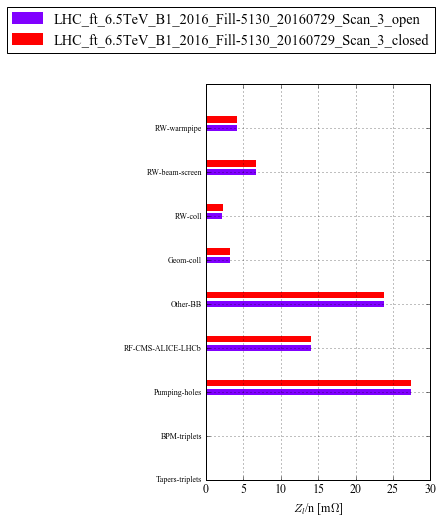

In [9]:
comp_vec=['long']

colors = cm.rainbow(np.linspace(0, 1, len(filename)))

fig = plt.figure(figsize=(8,12))

for icomp , comp in enumerate(comp_vec):
    
    
    ax = fig.add_subplot(2,2,icomp+1)
    
    
    
    for ind,fn in enumerate(filename):
        x_vec=[];
        for element in element_vec:

            x = imp_mod_scan[fn][element]['Z_over_n_eff_'+comp]
            x_vec.append(x.imag)

        x_vec=np.array(x_vec)

        ax.barh(np.arange(len(x_vec))+.2*ind, x_vec*1e3, .1, 
             align='center', edgecolor=colors[ind], facecolor = colors[ind], alpha = 1, linewidth = 2)
        

    plt.yticks(np.arange(len(element_vec)), element_vec, fontsize=8)
    plt.ylim(0,len(element_vec))
#     plt.xlim(0,5e-5)
    plt.xlabel('$Z_l$/n [m$\Omega$]')
    plt.grid()
    if icomp==0: lgd = plt.legend(filename,bbox_to_anchor=(1.05, 1.215))
    plt.tight_layout()      

plt.savefig(ResultDir+comment+'_Z_over_n_eff_total.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(ResultDir+comment+'_Z_over_n_total.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')   
print ResultDir+comment+'_Z_over_n_total.png'

### Load in dict the collimator impedances

In [10]:
# we assume all scenario have the same collimators!
for ind,fn in enumerate(filename):
    
    reader = csv.DictReader(open(CollDir+fn+'.txt'),delimiter='\t')
    names = []; gaps = []
    for row in reader:
        names.append(row['Name'])

        
element_vec = np.unique(names);

comp_vec=['Zlong','Zxdip','Zydip','Zxquad','Zyquad']

for ind,fn in enumerate(filename):
    print fn
    
    for element in element_vec:
        
        imp_mod_scan[fn][element]= {}
        print element
        imp_mod = []
        for comp in comp_vec:    
            try: 
                iw = imp.imp_model_from_file(mainDir+fn+'/'+comp+'_'+element+'_RW.dat'
                                             ,comp, ignored_rows=1)
                imp.add_impedance_wake(imp_mod,iw,1,1)
                iw = imp.imp_model_from_file(mainDir+fn+'/'+comp+'_'+element+'_Geom.dat'
                                             ,comp, ignored_rows=1)
                imp.add_impedance_wake(imp_mod,iw,1,1)
            except IOError: 
                print "No "+comp+" component: adding zeros"
                a,b,c,d,plane,wakeflag=imp.identify_component(comp)
                Z = imp.impedance_wake(a=a,b=b,c=c,d=d, plane=plane)
                Z.func = np.vstack((Z.func,Z.func)).T
                imp.add_impedance_wake(imp_mod,[Z],1,1)
        
        imp_mod_scan[fn][element]['imp_mod']= imp_mod
        
        print 'Getting tune shift...'
        Zeff_tot = 0
        ts_tot = 0
        for comp in ['xdip', 'xquad','ydip', 'yquad']:
            if 'x' in comp:
                Q = machine.Qx
            elif 'y' in comp:
                Q = machine.Qy     
            tuneshift_most, tuneshift_nx, tuneshift_m0, Zeff = imp.sacherer(imp_mod, machine.Qp, nxscan, machine.Nbscan, omegasscan, machine.M, 
                     machine.omega0, Q, machine.gamma, machine.eta, machine.taub, mmax, particle='proton', modetype='sinusoidal', compname='Z'+comp)
            imp_mod_scan[fn][element]['tuneshift_m0_'+comp]= []
            imp_mod_scan[fn][element]['Zeff_'+comp]= []
            imp_mod_scan[fn][element]['tuneshift_m0_'+comp]= np.squeeze(tuneshift_m0)
            imp_mod_scan[fn][element]['Zeff_'+comp]= np.squeeze(Zeff)
        
        for comp in ['long']:
            Zleff = imp.Zl_eff(imp_mod,machine,1)
            imp_mod_scan[fn][element]['Z_over_n_eff_'+comp]= []
            imp_mod_scan[fn][element]['Z_over_n_eff_'+comp]= Zleff
        
        

LHC_ft_6.5TeV_B1_2016_Fill-5130_20160729_Scan_3_open
TCDQA.A4R6.B
Getting tune shift...
Sacherer: Qp= 0 , M= 1 , omegas= 0.00212193980709 , m= 0 , Most unstable coupled-bunch mode:  0
Sacherer: Qp= 0 , M= 1 , omegas= 0.00212193980709 , m= 0 , Most unstable coupled-bunch mode:  0
Sacherer: Qp= 0 , M= 1 , omegas= 0.00212193980709 , m= 0 , Most unstable coupled-bunch mode:  0
Sacherer: Qp= 0 , M= 1 , omegas= 0.00212193980709 , m= 0 , Most unstable coupled-bunch mode:  0
max number of line index Pmax=197068
TCDQA.B4R6.B
Getting tune shift...
Sacherer: Qp= 0 , M= 1 , omegas= 0.00212193980709 , m= 0 , Most unstable coupled-bunch mode:  0
Sacherer: Qp= 0 , M= 1 , omegas= 0.00212193980709 , m= 0 , Most unstable coupled-bunch mode:  0
Sacherer: Qp= 0 , M= 1 , omegas= 0.00212193980709 , m= 0 , Most unstable coupled-bunch mode:  0
Sacherer: Qp= 0 , M= 1 , omegas= 0.00212193980709 , m= 0 , Most unstable coupled-bunch mode:  0
max number of line index Pmax=197068
TCDQA.C4R6.B
Getting tune shift...


### Tune shift by collimator

/afs/cern.ch/user/n/nbiancac/ln_work/scratch0/DELPHI_results/LHC/MD/Results/Fill-5130_20160729_Scan_3_tsm0_coll.png


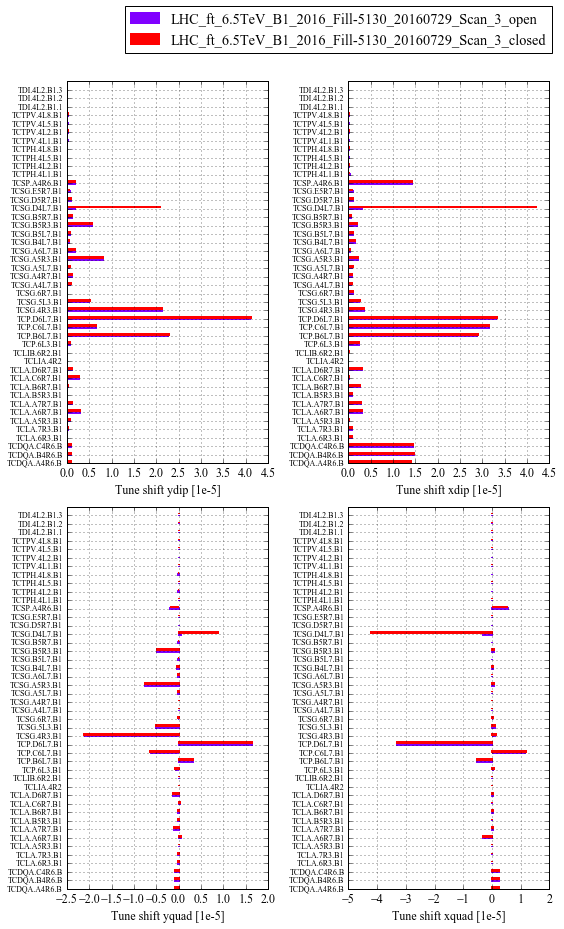

In [11]:
comp_vec=['ydip', 'xdip','yquad','xquad']

colors = cm.rainbow(np.linspace(0, 1, len(filename)))

fig = plt.figure(figsize=(8,12))

for icomp , comp in enumerate(comp_vec):
    
    
    ax = fig.add_subplot(2,2,icomp+1)
    
    
    
    for ind,fn in enumerate(filename):
        x_vec=[];
        for element in element_vec:

            x = imp_mod_scan[fn][element]['tuneshift_m0_'+comp]
            x_vec.append(-x.real)

        x_vec=np.array(x_vec)

        ax.barh(np.arange(len(x_vec))+.2*ind, x_vec*1e5, .1, 
             align='center', edgecolor=colors[ind], facecolor = colors[ind], alpha = 1, linewidth = 2)
        

    plt.yticks(np.arange(len(element_vec)), element_vec, fontsize=8)
    plt.ylim(0,len(element_vec))
#     plt.xlim(0,5e-5)
    plt.xlabel('Tune shift '+comp+' [1e-5]')
    plt.grid()
    if icomp==1: lgd = plt.legend(filename,bbox_to_anchor=(1.05, 1.215))
    plt.tight_layout()      

plt.savefig(ResultDir+comment+'_tsm0_coll.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(ResultDir+comment+'_tsm0_coll.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')   
print ResultDir+comment+'_tsm0_coll.png'

/afs/cern.ch/user/n/nbiancac/ln_work/scratch0/DELPHI_results/LHC/MD/Results/Fill-5130_20160729_Scan_3_Zteff_coll.png


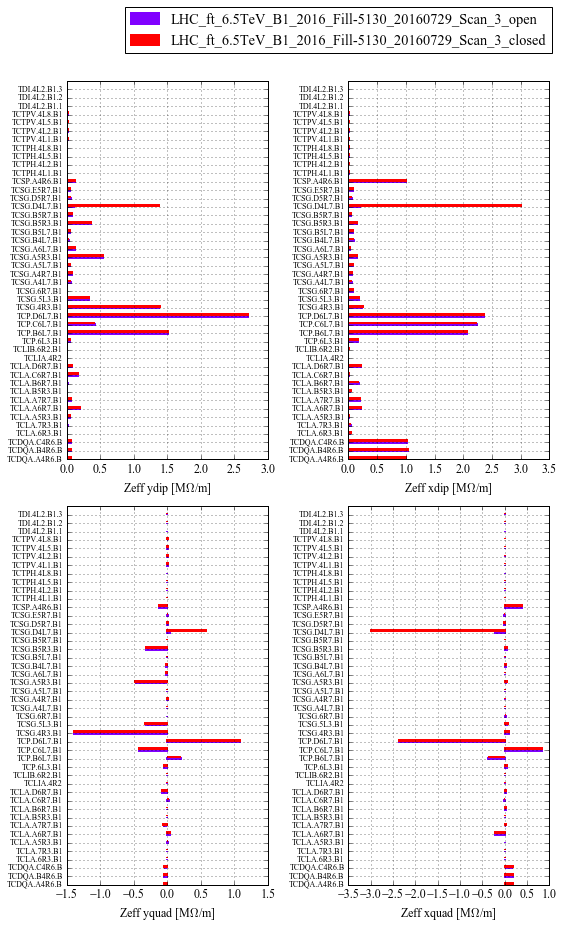

In [12]:
comp_vec=['ydip', 'xdip','yquad','xquad']

colors = cm.rainbow(np.linspace(0, 1, len(filename)))

fig = plt.figure(figsize=(8,12))

for icomp , comp in enumerate(comp_vec):
    
    
    ax = fig.add_subplot(2,2,icomp+1)
    
    
    
    for ind,fn in enumerate(filename):
        x_vec=[];
        for element in element_vec:

            x = imp_mod_scan[fn][element]['Zeff_'+comp]
            x_vec.append(x.imag)

        x_vec=np.array(x_vec)

        ax.barh(np.arange(len(x_vec))+.2*ind, x_vec*1e-6, .1, 
             align='center', edgecolor=colors[ind], facecolor = colors[ind], alpha = 1, linewidth = 2)
        

    plt.yticks(np.arange(len(element_vec)), element_vec, fontsize=8)
    plt.ylim(0,len(element_vec))
#     plt.xlim(0,5e-5)
    plt.xlabel('Zeff '+comp+' [M$\Omega$/m]')
    plt.grid()
    if icomp==1: lgd = plt.legend(filename,bbox_to_anchor=(1.05, 1.215))
    plt.tight_layout()      

plt.savefig(ResultDir+comment+'_Zteff_coll.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(ResultDir+comment+'_Zteff_coll.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')   
print ResultDir+comment+'_Zteff_coll.png'

/afs/cern.ch/user/n/nbiancac/ln_work/scratch0/DELPHI_results/LHC/MD/Results/Fill-5130_20160729_Scan_3_Z_over_n_coll.png


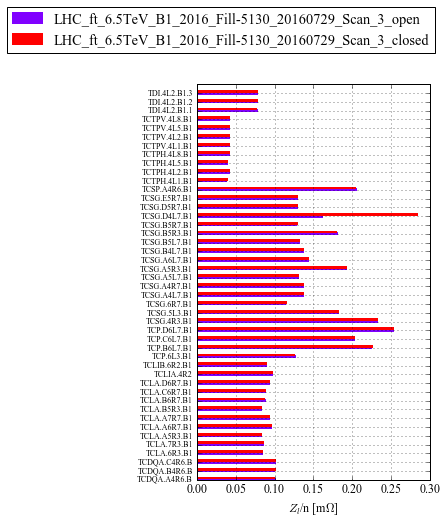

In [13]:
comp_vec=['long']

colors = cm.rainbow(np.linspace(0, 1, len(filename)))

fig = plt.figure(figsize=(8,12))

for icomp , comp in enumerate(comp_vec):
    
    
    ax = fig.add_subplot(2,2,icomp+1)
    
    
    
    for ind,fn in enumerate(filename):
        x_vec=[];
        for element in element_vec:

            x = imp_mod_scan[fn][element]['Z_over_n_eff_'+comp]
            x_vec.append(x.imag)

        x_vec=np.array(x_vec)

        ax.barh(np.arange(len(x_vec))+.2*ind, x_vec*1e3, .1, 
             align='center', edgecolor=colors[ind], facecolor = colors[ind], alpha = 1, linewidth = 2)
        

    plt.yticks(np.arange(len(element_vec)), element_vec, fontsize=8)
    plt.ylim(0,len(element_vec))
#     plt.xlim(0,5e-5)
    plt.xlabel('$Z_l$/n [m$\Omega$]')
    plt.grid()
    if icomp==0: lgd = plt.legend(filename,bbox_to_anchor=(1.05, 1.215))
    plt.tight_layout()      

plt.savefig(ResultDir+comment+'_Z_over_n_eff_coll.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(ResultDir+comment+'_Z_over_n__coll.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')   
print ResultDir+comment+'_Z_over_n_coll.png'

###  Tune shift by group of collimators

/afs/cern.ch/user/n/nbiancac/ln_work/scratch0/DELPHI_results/LHC/MD/Results/Fill-5130_20160729_Scan_3_tsm0_collgroup.png


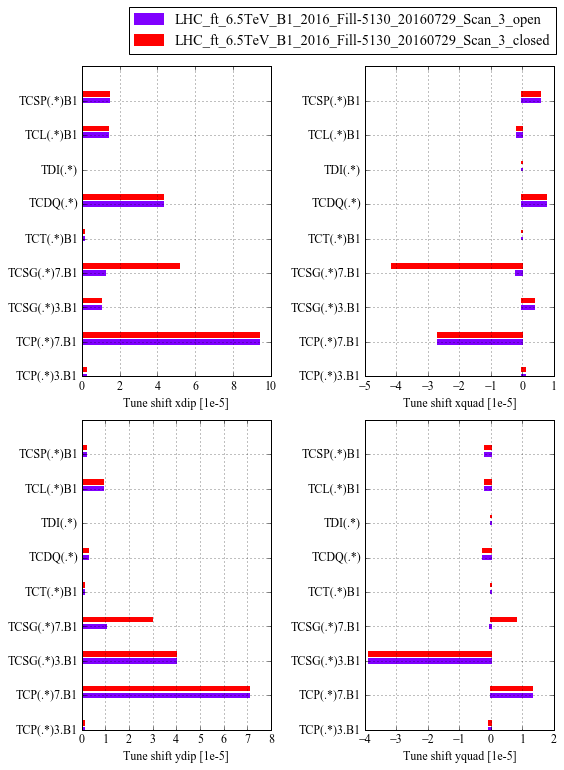

In [14]:
import re

group_vec =['TCP(.*)3.B1','TCP(.*)7.B1','TCSG(.*)3.B1','TCSG(.*)7.B1','TCT(.*)B1','TCDQ(.*)','TDI(.*)'
           ,'TCL(.*)B1','TCSP(.*)B1'];

comp_vec= ['xdip','xquad','ydip','yquad']

for ind,fn in enumerate(filename):
    
    for group in group_vec:
        
        imp_mod_scan[fn][group]={}    
        
        for comp in comp_vec:
            
            imp_mod_scan[fn][group]['tuneshift_m0_'+comp]=[]
            x_vec=[]
            for element in element_vec:
                m = re.search(group, element)
                if m:
                    x = imp_mod_scan[fn][element]['tuneshift_m0_'+comp]
                    x_vec.append(x)
                    

            imp_mod_scan[fn][group]['tuneshift_m0_'+comp]=np.sum(x_vec)

            
colors = cm.rainbow(np.linspace(0, 1, len(filename)))

fig = plt.figure(figsize=(8,10))

for icomp , comp in enumerate(comp_vec):
    
    
    ax = fig.add_subplot(2,2,icomp+1)
    
    
    
    for ind,fn in enumerate(filename):
        x_vec=[];
        for group in group_vec:

            x = imp_mod_scan[fn][group]['tuneshift_m0_'+comp]
            x_vec.append(-x.real)

        x_vec=np.array(x_vec)

        ax.barh(np.arange(len(x_vec))+.2*ind, x_vec*1e5, .1, 
             align='center', edgecolor=colors[ind], facecolor = colors[ind], alpha = 1, linewidth = 2)
        

    plt.yticks(np.arange(len(group_vec)), group_vec)
    plt.ylim(0,len(group_vec))
    # plt.xlim(0,5e-5)
    plt.xlabel('Tune shift '+comp+' [1e-5]')
    plt.grid()
    if icomp==1: lgd = plt.legend(filename,bbox_to_anchor=(1.05, 1.215))
    plt.tight_layout()      

plt.savefig(ResultDir+comment+'_tsm0_collgroup.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(ResultDir+comment+'_tsm0_collgroup.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')   
print ResultDir+comment+'_tsm0_collgroup.png'

/afs/cern.ch/user/n/nbiancac/ln_work/scratch0/DELPHI_results/LHC/MD/Results/Fill-5130_20160729_Scan_3_Zteff_collgroup.png


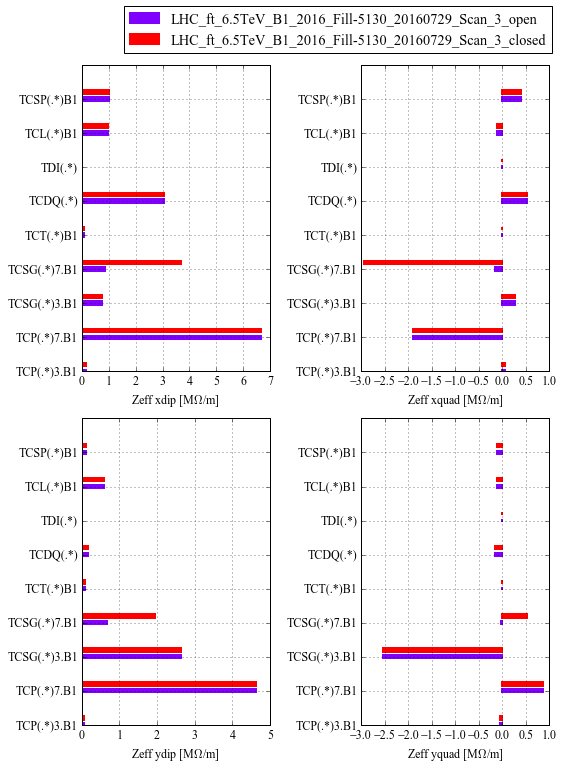

In [15]:
import re

group_vec =['TCP(.*)3.B1','TCP(.*)7.B1','TCSG(.*)3.B1','TCSG(.*)7.B1','TCT(.*)B1','TCDQ(.*)','TDI(.*)'
           ,'TCL(.*)B1','TCSP(.*)B1'];

comp_vec= ['xdip','xquad','ydip','yquad']

for ind,fn in enumerate(filename):
    
    for group in group_vec:
        
        
        
        for comp in comp_vec:
            
            imp_mod_scan[fn][group]['Zeff_'+comp]=[]
            x_vec=[]
            for element in element_vec:
                m = re.search(group, element)
                if m:
                    x = imp_mod_scan[fn][element]['Zeff_'+comp]
                    x_vec.append(x)
                    

            imp_mod_scan[fn][group]['Zeff_'+comp]=np.sum(x_vec)

            
colors = cm.rainbow(np.linspace(0, 1, len(filename)))

fig = plt.figure(figsize=(8,10))

for icomp , comp in enumerate(comp_vec):
    
    
    ax = fig.add_subplot(2,2,icomp+1)
    
    
    
    for ind,fn in enumerate(filename):
        x_vec=[];
        for group in group_vec:

            x = imp_mod_scan[fn][group]['Zeff_'+comp]
            x_vec.append(x.imag)

        x_vec=np.array(x_vec)

        ax.barh(np.arange(len(x_vec))+.2*ind, x_vec*1e-6, .1, 
             align='center', edgecolor=colors[ind], facecolor = colors[ind], alpha = 1, linewidth = 2)
        

    plt.yticks(np.arange(len(group_vec)), group_vec)
    plt.ylim(0,len(group_vec))
    # plt.xlim(0,5e-5)
    plt.xlabel('Zeff '+comp+' [M$\Omega$/m]')
    plt.grid()
    if icomp==1: lgd = plt.legend(filename,bbox_to_anchor=(1.05, 1.215))
    plt.tight_layout()      

plt.savefig(ResultDir+comment+'_Zteff_collgroup.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(ResultDir+comment+'_Zteff_collgroup.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')   
print ResultDir+comment+'_Zteff_collgroup.png'

/afs/cern.ch/user/n/nbiancac/ln_work/scratch0/DELPHI_results/LHC/MD/Results/Fill-5130_20160729_Scan_3_Z_over_n_eff_collgroup.png


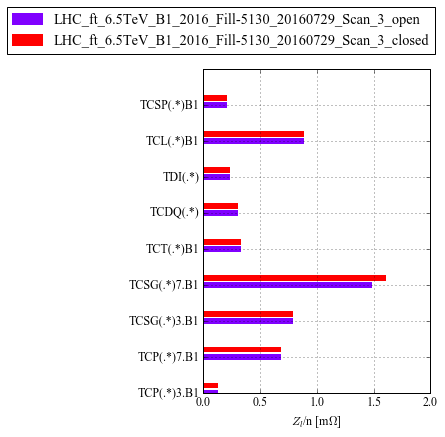

In [16]:
import re

group_vec =['TCP(.*)3.B1','TCP(.*)7.B1','TCSG(.*)3.B1','TCSG(.*)7.B1','TCT(.*)B1','TCDQ(.*)','TDI(.*)'
           ,'TCL(.*)B1','TCSP(.*)B1'];

comp_vec= ['long']

for ind,fn in enumerate(filename):
    
    for group in group_vec:
        
        for comp in comp_vec:
            
            imp_mod_scan[fn][group]['Z_over_n_eff_'+comp]=[]
            x_vec=[]
            for element in element_vec:
                m = re.search(group, element)
                if m:
                    x = imp_mod_scan[fn][element]['Z_over_n_eff_'+comp]
                    x_vec.append(x)
                    

            imp_mod_scan[fn][group]['Z_over_n_eff_'+comp]=np.sum(x_vec)

            
colors = cm.rainbow(np.linspace(0, 1, len(filename)))

fig = plt.figure(figsize=(8,10))

for icomp , comp in enumerate(comp_vec):
    
    
    ax = fig.add_subplot(2,2,icomp+1)
    
    
    
    for ind,fn in enumerate(filename):
        x_vec=[];
        for group in group_vec:

            x = imp_mod_scan[fn][group]['Z_over_n_eff_'+comp]
            x_vec.append(x.imag)

        x_vec=np.array(x_vec)

        ax.barh(np.arange(len(x_vec))+.2*ind, x_vec*1e3, .1, 
             align='center', edgecolor=colors[ind], facecolor = colors[ind], alpha = 1, linewidth = 2)
        

    plt.yticks(np.arange(len(group_vec)), group_vec)
    plt.ylim(0,len(group_vec))
    plt.xlim(0,2)
    plt.xlabel('$Z_l$/n [m$\Omega$]')
    plt.grid()
    if icomp==0: lgd = plt.legend(filename,bbox_to_anchor=(1.05, 1.215))
    plt.tight_layout()      

plt.savefig(ResultDir+comment+'_Z_over_n_eff_collgroup.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(ResultDir+comment+'_Z_over_n_eff_collgroup.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')   
print ResultDir+comment+'_Z_over_n_eff_collgroup.png'

### Export to CSV

In [17]:
import pandas
    
for fn in filename:
    element_vec = imp_mod_scan[fn].keys()
    if 'machine' in element_vec: element_vec.pop(element_vec.index('machine'))

    comp_vec = ['xdip', 'xquad','ydip', 'yquad']

    mat=[]
    for element in element_vec:
        data=[]
        for comp in comp_vec:
            data.append(imp_mod_scan[fn][element]['tuneshift_m0_'+comp].real)
        mat.append(data)
    mat=np.array(mat)

    df = pandas.DataFrame(mat, element_vec, comp_vec)
    df.to_csv(ResultDir+fn+'_tsm0.csv')
    
    mat=[]
    for element in element_vec:
        data=[]
        for comp in comp_vec:
            data.append(imp_mod_scan[fn][element]['Zeff_'+comp].imag)
        mat.append(data)
    mat=np.array(mat)

    df = pandas.DataFrame(mat, element_vec, comp_vec)
    df.to_csv(ResultDir+fn+'_Zteff.csv')
    
    comp_vec = ['long']

    mat=[]
    for element in element_vec:
        data=[]
        for comp in comp_vec:
            data.append(imp_mod_scan[fn][element]['Z_over_n_eff_'+comp].imag)
        mat.append(data)
    mat=np.array(mat)


    df = pandas.DataFrame(mat, element_vec, comp_vec)
    df.to_csv(ResultDir+fn+'_Z_over_n_eff.csv')
    